# Finance Job Market Analysis

This notebook is where I will be conducting exploratory data analysis.

## EDA

### Loading the data

After cleaning there are 28,634 unique listings.

In [498]:
import pandas as pd

# Visualization
%matplotlib inline
import seaborn as sns

linkedin = pd.read_csv("data/cleaned.csv")

display(linkedin.head(1))
linkedin.describe()

,date_scraped,title,full_url,company,company_url,location,description,seniority_level,employment_type,job_function,industries
0,2022-10-04,Quantitative analyst (finance),https://www.linkedin.com/jobs/view/quantitativ...,"Lucas Group, A Korn Ferry Company",https://www.linkedin.com/company/lucas-group?t...,"Charlotte, NC","\n <p>Lucas Group, a Korn Ferry company...",Associate,Full-time,Finance,Banking


,date_scraped,title,full_url,company,company_url,location,description,seniority_level,employment_type,job_function,industries
count,28634,28634,28634,28634,28634,28634,28634,28634,28634,28634,28634
unique,7,11956,28634,6985,6992,3027,14095,6,4,670,975
top,2022-09-30,Remote Tax Professional,https://www.linkedin.com/jobs/view/quantitativ...,Aston Carter,https://www.linkedin.com/company/aston-carter?...,United States,\n <strong><u>What You'll Do...<br><br>...,Associate,Full-time,Not Assigned,Not Assigned
freq,5568,1214,1,1589,1589,1792,1229,10997,19586,8293,8294


### Locations

[Text(0.5, 1.0, 'Top 10 Locations')]

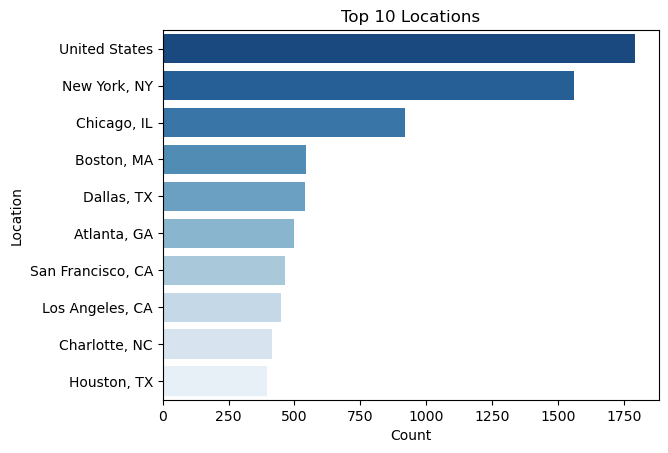

In [499]:
locations = pd.DataFrame(linkedin["location"].value_counts()).reset_index()
locations.rename(columns={"index": "Location", "location": "Count"}, inplace=True)

palette = reversed(sns.color_palette("Blues", 10))
sns.barplot(data=locations.iloc[:10], y="Location", x="Count", palette=palette).set(title='Top 10 Locations')

In [500]:
import plotly.graph_objects as go

# Drop location "United States"
locations.drop(index=0, inplace=True)

# Get State Instead of City and State
locations["Location"] = locations["Location"].map(lambda x: x[-2:])
locations = locations.groupby(locations["Location"]).aggregate('sum').reset_index()

# Map Figure
fig = go.Figure(data=go.Choropleth(
    locations=locations["Location"],
    z=locations["Count"],
    locationmode='USA-states',
    colorscale='Blues',
    autocolorscale=False,
    marker_line_color='black',
))

fig.update_layout(
    title_text='Job Listings by State',
    geo = dict(
        scope='usa',
))

fig.show()

Jobs with "United States" as the location are most likely remote positions. New York City and Chicago have a much higher share of jobs relative to other cities. Since New York City and Chicago are the homes of the major US security markets, it makes since that those 2 cities would have the greatest number of finance jobs.

The states of California, New York, Texas, Illinois, and Florida have the most jobs.

### Industries

In [501]:
linkedin["industries"].value_counts()

Not Assigned                                                                          8294
Staffing and Recruiting                                                               3112
Financial Services                                                                    1691
Financial Services and Retail                                                         1120
Accounting                                                                             924
                                                                                      ... 
Newspaper Publishing, Online Audio and Video Media, Book and Periodical Publishing       1
Research Services, Staffing and Recruiting, Executive Offices                            1
Staffing and Recruiting, Retail, Hospitality                                             1
Financial Services, Biotechnology Research, Pharmaceutical Manufacturing                 1
Consumer Services, Retail, Hospitality                                                   1

Not Assigned can be dropped. Also, some listings have multiple different industries separated by a comma.

[Text(0.5, 1.0, 'Top 15 Industries')]

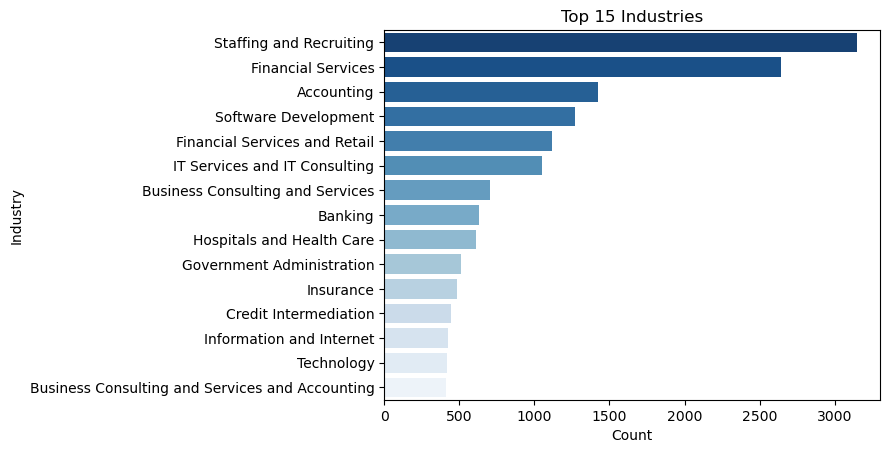

In [502]:
industries = []
def get_industries(x):
    for industry in str(x).split(', '):
        if "Not Assigned" not in industry:
            industries.append(industry)

# Derive industries
linkedin["industries"].map(get_industries)

industries = pd.Series(industries, name="Count").value_counts().reset_index()
industries.rename(columns={"index": "Industry"}, inplace=True)

palette = reversed(sns.color_palette("Blues", 15))
sns.barplot(data=industries.iloc[:15], y="Industry", x="Count", palette=palette).set(title='Top 15 Industries')

In [503]:
linkedin["company"].value_counts()

Aston Carter                1589
H&R Block                   1278
Grant Thornton LLP (US)      728
RemoteWorker US              620
PwC                          474
                            ... 
Eureka Multifamily Group       1
University of Phoenix          1
5th Avenue Recruiting          1
JES Holdings, LLC              1
Jamestown                      1
Name: company, Length: 6985, dtype: int64

Staffing/ Recruiting is interestingly the most common industry making postings. This is likely due to staffing firms making many postings, as several of the most repeated companies in the dataset are staffing firms.

Besides Staffing/ Recruiting, many of the top 15 industries are directly in the financial industry as expected. 

Software development, IT, Information/Internet, and Technology where information systems domain knowledge may be useful make up numbers 4, 6, 12, and 13 respectively.

### Skills


[Text(0.5, 1.0, 'Most In Demand Skills')]

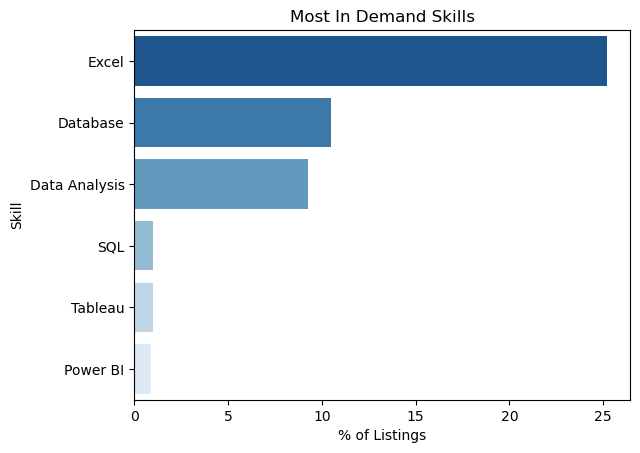

In [504]:
import re

# Tuple containing the skill name and it's regex pattern
# 0 is the name and 1 is the regex pattern
skills_search = [
    ('Data Analysis', 'data anal'),
    ('SQL', 'sql'),
    ('Database', 'database'),
    ('Excel', 'excel |excel.|excel,'),
    ('Tableau', 'tableau'),
    ('Power BI', 'power bi')
]

skills = []
def get_skills(x):
    for skill in skills_search:
        if re.search(skill[1], x) != None:
            skills.append(skill[0])

linkedin["description"].map(get_skills)

skills = pd.Series(skills, name="Count").value_counts().reset_index()
skills.rename(columns={"index": "Skill"}, inplace=True)

skills['% of Listings'] = skills['Count'] / linkedin.shape[0] * 100

length = len(skills_search)
palette = reversed(sns.color_palette("Blues", length))
sns.barplot(data=skills.iloc[:length], y="Skill", x='% of Listings', palette=palette).set(title='Most In Demand Skills')

Excel is a must-have skill, it is mentioned in 25% of the job listings.

## Findings

### Where are the most jobs located?

New York City and Chicago have the greatest proportion of the jobs relative to other cities in the United States. 

The states of California, New York, Texas, Illinois, and Florida have the most jobs overall.
  
### Which industries have the most jobs?

Unsurprisingly jobs directly in the financial services industry are the most common, but tech is common as well. Software development, IT, Information/Internet, and Technology make up numbers 4, 6, 12, and 13 respectively.

### How can I best prepare myself for getting a job, what skills are in demand beyond an education in Finance?

Excel is the most in demand skill, being mentioned in 25% of the job descriptions. Database, and Data Analysis are second and third, both around 10%.

SQL, Tableau, and Power BI were mentioned in about 1% of the postings, however these skills may set a job candidate apart from others seeking the same role.

### Would my MIS degree make me more marketable?

Database knowledge and data analysis skills are high in demand which are topics covered in the MIS degree program. Also, IT and tech are in the top 15 industries and in these industries information systems domain knowledge may be useful.